In [43]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [44]:
def mean_filter(img: np.ndarray, kernel_size: int) -> np.ndarray:
    """
    Applies a mean filter to an image

    Args:
        img (np.ndarray): The original image
        kernel_size (int): The size of the kernel that will pass through the image

    Returns: 
        np.ndarray: The filtered image
    """
    
    # Creating the new image
    new_image = np.zeros(img.shape, dtype=np.float64)

    # Defining the padding size and creating a padded image
    padding_size = kernel_size // 2
    padded_img = np.pad(img, padding_size, mode = 'edge')

    # Now we perform the filtering operation by sliding the kernel across the padded image
    # and calculating the mean of that region
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            neighbourhood = padded_img[r: r + kernel_size, c: c + kernel_size]
            new_image[r, c] = np.mean(neighbourhood)

    return new_image.astype(np.uint8)


In [45]:
def median_filter(img: np.ndarray, kernel_size: int) -> np.ndarray:
    """
    Applies a median filter to an image

    Args:
        img (np.ndarray): The original image
        kernel_size (int): The size of the kernel that will pass through the image

    Returns: 
        np.ndarray: The filtered image
    """

    # Creating the new image
    new_image = np.zeros(img.shape, dtype=np.float64)

    # Defining the padding size and creating a padded image
    padding_size = kernel_size // 2
    padded_img = np.pad(img, padding_size, mode = 'edge')

    # Now we perform the filtering operation by sliding the kernel across the padded image
    # and calculating the median of that region
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            neighbourhood = padded_img[r: r + kernel_size, c: c + kernel_size]
            new_image[r, c] = np.median(neighbourhood)

    return new_image.astype(np.uint8)

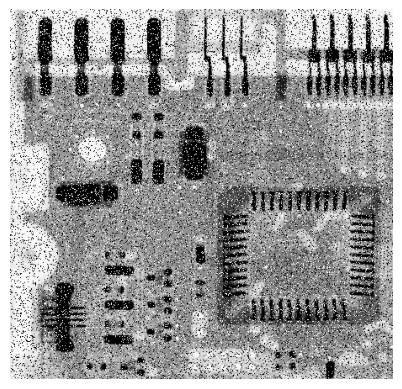

In [46]:
# We begin by opening the image and converting it to grayscale
IMG_BGR = cv2.imread("Fig0335(a)(ckt_board_saltpep_prob_pt05).tif")
IMG_GRAY = cv2.cvtColor(IMG_BGR, cv2.COLOR_BGR2GRAY)

plt.axis("off")
plt.imshow(IMG_GRAY, cmap="gray")
plt.show()

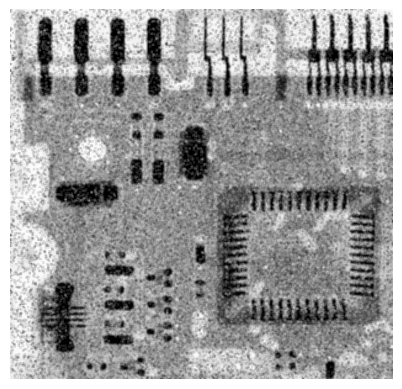

In [47]:
# First the mean filter is applied
MEAN_FILTERED_IMG = mean_filter(IMG_GRAY, 3)

# Then its effects are visualized
plt.axis("off")
plt.imshow(MEAN_FILTERED_IMG, cmap="gray")
plt.show()

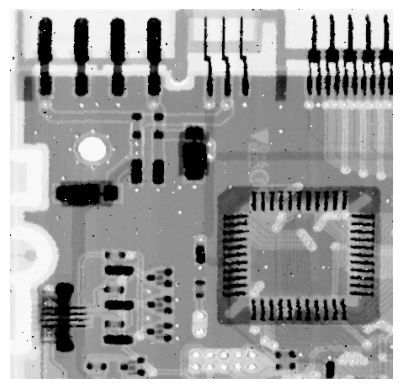

In [48]:
# Then the median filter is applied and its effects visualized
MEDIAN_FILTERED_IMG = median_filter(IMG_GRAY, 3)
plt.axis("off")
plt.imshow(MEDIAN_FILTERED_IMG, cmap="gray")
plt.show()

In [49]:
# Then the results are saved in a "results" file
output_path = os.path.join("./results", f"mean_filtered_board.png")
cv2.imwrite(output_path, MEAN_FILTERED_IMG)
output_path = os.path.join("./results", f"median_filtered_board.png")
cv2.imwrite(output_path, MEDIAN_FILTERED_IMG)

True